In [1]:
import os
import glob

import pandas as pd
import numpy as np
import seaborn as sns

from tqdm.notebook import tqdm, trange
import time

#nltk.download('punkt') #Uncomment if first run
#nltk.download('wordnet') #Uncomment if first run
#nltk.download('stopwords')
#nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.lm import counter

In [2]:
stop = set(stopwords.words('english'))

In [17]:
never_words = ['http', "n't", 'need', 'make', "jacksonwang852"]
def preprocess_tweets(element):
    lem=WordNetLemmatizer()
    words=[w for w in word_tokenize(element) if (w not in stop)]
    words=[lem.lemmatize(w.lower()) for w in words if len(w)>2]
    words=[word.lower() for word in words if word not in stop and word not in never_words]
    return words


In [10]:
#try:
#    df = pd.read_json('/home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/abortion_clinic.json')
#except ValueError:
#    df = pd.read_json('/home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/abortion_clinic.json', lines=True)
print(os.getcwd())

/home/karl/PycharmProjects/UCSF_dobbs_roe


In [5]:
directory = '/home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01' # must use absolute path

file_list = list(glob.glob(os.path.join(directory,'*.*')))

In [16]:
dfs = [] # an empty list to store the data frames
for file in tqdm(file_list):
    print("Reading json file: ",file)
    try:
        data = pd.read_json(open(file, 'r', encoding='utf-8'), lines = True) # read data frame from json file
        dfs.append(data) # append the data frame to the list
    except ValueError:
        print("\n***Error reading json file***: ", file, "\n")

all_df = pd.concat(dfs, ignore_index=True) # concatenate all the data frames in the list.

  0%|          | 0/40 [00:00<?, ?it/s]

Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/jackson.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_clinic.json

***Error reading json file***:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_clinic.json 

Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_hospital.json

***Error reading json file***:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/wade_hospital.json 

Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/dobbs_healthcare.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/abortion_physician.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/dobs_physician.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs_roe/data/from_2020_06_01/roe_visit.json
Reading json file:  /home/karl/PycharmProjects/UCSF_dobbs

In [7]:
all_df

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,snscrape.modules.twitter.Tweet,https://twitter.com/matt_nevett_/status/156997...,2022-09-14 08:44:14+00:00,Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...,Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...,1569970266117402624,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,{'_type': 'snscrape.modules.twitter.SummaryCar...
1,snscrape.modules.twitter.Tweet,https://twitter.com/Fionape30319092/status/156...,2022-09-14 08:44:13+00:00,@HairyMonkeyGor1 @tribunaltweets Absolutely lo...,@HairyMonkeyGor1 @tribunaltweets Absolutely lo...,1569970263000846338,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.569961e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/ChelseaHanson/status/15699...,2022-09-14 08:44:00+00:00,"""Clear, light and instructive, The Sudden Loss...","""Clear, light and instructive, The Sudden Loss...",1569970204733755394,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/WorldWearyWoman/status/156...,2022-09-14 08:43:55+00:00,"“It’s not a competition” … but Ms Jackson, you...","“It’s not a competition” … but Ms Jackson, you...",1569970186198962178,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/FIRESTARTERrblx/status/156...,2022-09-14 08:43:49+00:00,Current fav songs are definitely got the time ...,Current fav songs are definitely got the time ...,1569970161318531073,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217946,snscrape.modules.twitter.Tweet,https://twitter.com/korauth314/status/15633157...,2022-08-27 00:01:43+00:00,@DermotKearney3 @rev_patriotic @StudentsforLif...,@DermotKearney3 @rev_patriotic @StudentsforLif...,1563315786953166849,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,None,1.563315e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
217947,snscrape.modules.twitter.Tweet,https://twitter.com/wewebb/status/156331454680...,2022-08-26 23:56:47+00:00,@MpvCarney @ncrawfordmd Even if the law allows...,@MpvCarney @ncrawfordmd Even if the law allows...,1563314546806509568,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.562938e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
217948,snscrape.modules.twitter.Tweet,https://twitter.com/be_be25/status/15633144882...,2022-08-26 23:56:33+00:00,@iu70us @32789ff @AramereSolblaze @mjs_DC That...,@iu70us @32789ff @AramereSolblaze @mjs_DC That...,1563314488220139521,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,0,...,NaN,None,1.563313e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
217949,snscrape.modules.twitter.Tweet,https://twitter.com/Undercross2022/status/1563...,2022-08-26 23:54:11+00:00,@NovElection2024 Helping? The same kind of hel...,@NovElection2024 Helping? The same kind of hel...,1563313892981256192,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.562887e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None


In [11]:
all_df = all_df.drop_duplicates('id')
all_df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,snscrape.modules.twitter.Tweet,https://twitter.com/matt_nevett_/status/156997...,2022-09-14 08:44:14+00:00,Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...,Wednesday Forum with ⁦@StevoMedia⁩ &amp; ⁦@mjb...,1569970266117402624,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,"[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,{'_type': 'snscrape.modules.twitter.SummaryCar...
1,snscrape.modules.twitter.Tweet,https://twitter.com/Fionape30319092/status/156...,2022-09-14 08:44:13+00:00,@HairyMonkeyGor1 @tribunaltweets Absolutely lo...,@HairyMonkeyGor1 @tribunaltweets Absolutely lo...,1569970263000846338,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.569961e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/ChelseaHanson/status/15699...,2022-09-14 08:44:00+00:00,"""Clear, light and instructive, The Sudden Loss...","""Clear, light and instructive, The Sudden Loss...",1569970204733755394,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/WorldWearyWoman/status/156...,2022-09-14 08:43:55+00:00,"“It’s not a competition” … but Ms Jackson, you...","“It’s not a competition” … but Ms Jackson, you...",1569970186198962178,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/FIRESTARTERrblx/status/156...,2022-09-14 08:43:49+00:00,Current fav songs are definitely got the time ...,Current fav songs are definitely got the time ...,1569970161318531073,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,None,None


In [18]:
all_df['preprocessedContent'] = all_df['rawContent'].apply(lambda x: preprocess_tweets(x))
all_df['preprocessedContent']

0         [wednesday, forum, stevomedia⁩, amp, mjbarlow2...
1         [hairymonkeygor1, tribunaltweets, absolutely, ...
2         [clear, light, instructive, sudden, loss, surv...
3         [competition, jackson, literally, said, seems,...
4         [current, fav, song, definitely, got, time, jo...
                                ...                        
367262    [sinclairitea, kimhuch3, sixofb, think, way, s...
367263    [chaoticmomo715, know, many, obgyn, left, prac...
367264    [dashdobrofsky, bukkakeolympian, came, teacher...
367265    [every, state, 👉google, 👉apple, 👉jeff, recordi...
367266    [aliceking69, ivygraysa20, geoannie135, wickab...
Name: preprocessedContent, Length: 367267, dtype: object

In [19]:
corpus = []
for i in tqdm(all_df['preprocessedContent']):
    for x in i:
        if x not in never_words:
            corpus.append(x.lower())

  0%|          | 0/367267 [00:00<?, ?it/s]

In [20]:
len(corpus)

6631410

<AxesSubplot:>

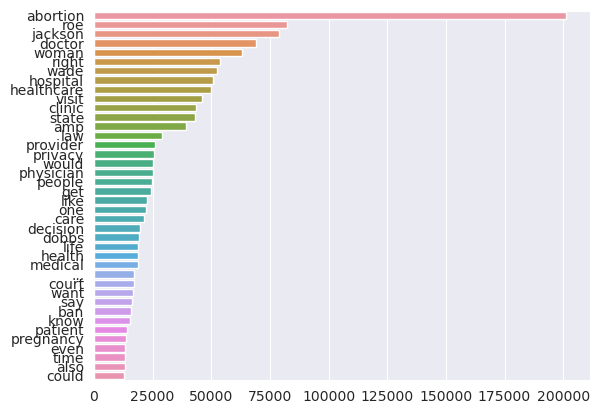

In [21]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

<AxesSubplot:>

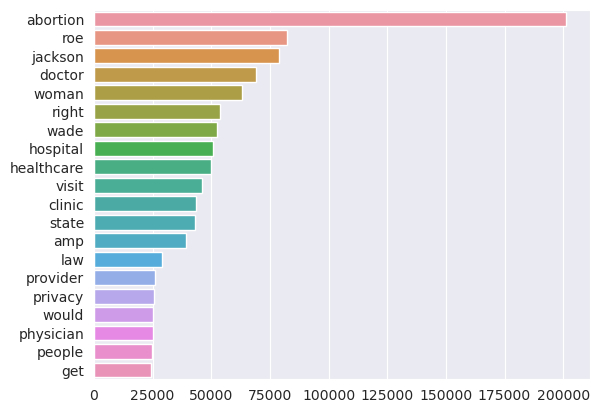

In [22]:
x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

sns.barplot(x=y,y=x)

In [23]:
most

[('abortion', 201360),
 ('roe', 82093),
 ('jackson', 78882),
 ('doctor', 69215),
 ('woman', 63265),
 ('right', 53523),
 ('wade', 52616),
 ('hospital', 50661),
 ('healthcare', 49848),
 ('visit', 45864),
 ('clinic', 43481),
 ('state', 43073),
 ('amp', 39180),
 ('law', 29130),
 ('provider', 26075),
 ('privacy', 25613),
 ('would', 25369),
 ('physician', 25040),
 ('people', 24542),
 ('get', 24456),
 ('like', 22468),
 ('one', 22151),
 ('care', 21326),
 ('decision', 19667),
 ('dobbs', 19347),
 ('life', 18941),
 ('health', 18835),
 ('medical', 18670),
 ('...', 17263),
 ('court', 17154),
 ('want', 16793),
 ('say', 16293),
 ('ban', 15852),
 ('know', 15262),
 ('patient', 14226),
 ('pregnancy', 13737),
 ('even', 13403),
 ('time', 13263),
 ('also', 13243),
 ('could', 12850),
 ('year', 12843),
 ('think', 12583),
 ('new', 12388),
 ('said', 12348),
 ('access', 11841),
 ('supreme', 11254),
 ('day', 11100),
 ('see', 10870),
 ('week', 10854),
 ('republican', 10736),
 ('ronny', 10727),
 ('overturned', 105

In [25]:
import gensim.models

In [ ]:
dic=gensim.corpora.Dictionary(all_df['preprocessedContent'])

In [ ]:
bow_corpus = []
for doc in tqdm(all_df['preprocessedContent']):
    bow_corpus.append(dic.doc2bow(doc))

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 12,
                                   id2word = dic,
                                   passes = 15,
                                   workers = 44)
lda_model.show_topics()


In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

In [ ]:
# topics: "dobbs", "jackson", "roe", "wade", "abortion", "privacy", "doctor", "provider", "physician", "clinic", "visit", "hospital",
# ['http', "n't", 'need', 'make']